Part-1 (A)


In [ ]:
GeneralNeuron
    ├── SensoryNeuron
    │       ├── Photoreceptor
    │       └── Mechanoreceptor
    └── MotorNeuron
            ├── AlphaMotorNeuron
            └── GammaMotorNeuron

Part-1 (B)


In [24]:
#Base Class
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate=firing_rate

    def activate(self, stimulus_strength):
        pass  #Define how the neuron responds to a stimulus


#Intermediate Class: SensoryNeuron
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, receptor_type=""):
        super().__init__(firing_rate)
        self.receptor_type=receptor_type

    def sense_stimulus(self, stimulus):
        pass  #Process stimulus and activate based on sensitivity


#Intermediate Class: MotorNeuron
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle=target_muscle

    def control_muscle(self, activation_level):
        pass  #Define motor control based on activation


#Leaf Class: Photoreceptor
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        pass  #Behavior specific to light intensity

    def unique_response_to_light(self, light_detection,):
        pass


#Leaf Class: Mechanoreceptor
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        pass  #Behavior specific to pressure

    def unique_response_to_pressure(self, pressure_level,):
        pass


#Leaf Class: AlphaMotorNeuron
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        pass  #Rapid, strong contractions

    def response_specific_to_skeletal_muscle(self, skeletal_muscles,):
        pass 

#Leaf Class: GammaMotorNeuron
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, activation_level):
        pass  #Gradual control for muscle tone

    def unique_control_mechanism(self, rapid_activation):
        pass #Exhibits a response specific to muscle spindles


Part-2 (Q1)

In [ ]:
pip install pandas numpy matplotlib #intall to use numpy and and matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


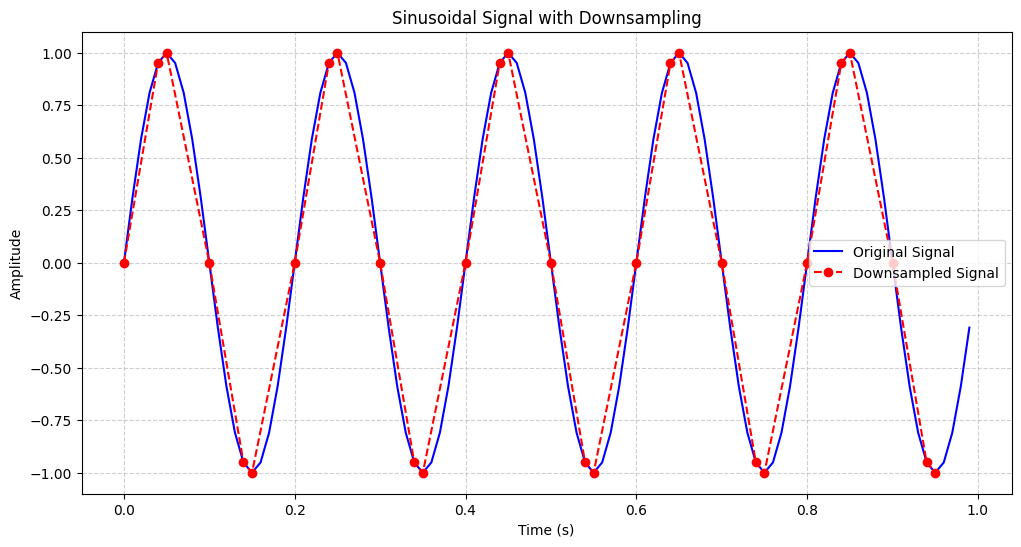

In [81]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt

#Function to downsample a sinusoidal signal
def downsample_signal(signal,sample_rate=5):
    """
    Downsamples a sinusoidal signal while preserving maxima and minima points.
    """
    #Find maxima (local peaks)
    max_indices=np.argwhere(np.diff(np.sign(np.diff(signal)))<0).flatten()

    #Find minima (local troughs)
    min_indices=np.argwhere(np.diff(np.sign(np.diff(signal)))>0).flatten()

    #Sample every 'sample_rate' points
    sampled_indices=np.arange(0,len(signal),sample_rate)

    #Combine and sort indices
    downsampled_indices=np.unique(np.sort(np.concatenate([
        max_indices,min_indices,sampled_indices
    ])))

    return downsampled_indices

#Create a sinusoidal signal with 5Hz frequency sampled at 0.01s intervals
time=np.arange(0,1,0.01) #Time points
frequency=5 #Hz
signal=np.sin(2*np.pi*frequency*time) #Sinusoidal signal

#Use the downsampling function
downsampled_indices=downsample_signal(signal,sample_rate=5)
downsampled_time=time[downsampled_indices]
downsampled_signal=signal[downsampled_indices]

#Plot the original and downsampled signals on the same axes
plt.figure(figsize=(12,6))
plt.plot(time,signal,label="Original Signal",color="b")
plt.plot(downsampled_time,downsampled_signal,label="Downsampled Signal",color="r",marker="o",linestyle="--")

#Add labels, title, and grid
plt.title("Sinusoidal Signal with Downsampling")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True,linestyle="--",alpha=0.6)
plt.legend()

plt.show()


Part-2 (Q2)

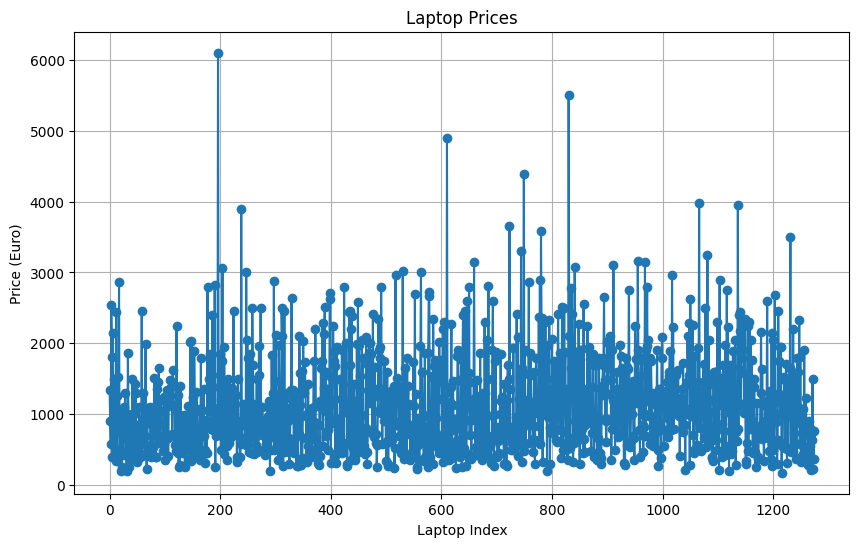

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load dataset
data=pd.read_csv("laptop_price - dataset - laptop_price - dataset.csv")
priceColumn=data['Price (Euro)']

#Plot the price of all laptops
plt.figure(figsize=(10, 6))
plt.plot(data["Price (Euro)"], marker='o')
plt.title("Laptop Prices")
plt.xlabel("Laptop Index")
plt.ylabel("Price (Euro)")
plt.grid(True)
plt.show()


In [ ]:
#Find company with the most expensive average laptop
avg_price_per_company=data.groupby("Company")['Price (Euro)'].mean()
most_expensive_company=avg_price_per_company.idxmax()
print(avg_price_per_company)
print(f"Most Expensive Company: {most_expensive_company}, Average Price: {avg_price_per_company[most_expensive_company]:.2f} Euro")

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
Most Expensive Company: Razer, Average Price: 3346.14 Euro


In [14]:
#Fix Operating System column
data["OpSys"]=data["OpSys"].str.lower().replace({
    "windows 10 pro": "windows",
    "windows 10": "windows",
    "mac os x": "macos",
    "mac os": "macos",
    "linux": "linux"
})
osc=data["OpSys"].value_counts()
print("Count of the operating systems after standardization:", osc)
print("Unique operating systems after standardization:", osc.index.tolist())

Count of the operating systems after standardization: OpSys
windows         1048
no os             66
linux             58
windows 7         45
chrome os         27
macos             21
windows 10 s       8
android            2
Name: count, dtype: int64
Unique operating systems after standardization: ['windows', 'no os', 'linux', 'windows 7', 'chrome os', 'macos', 'windows 10 s', 'android']


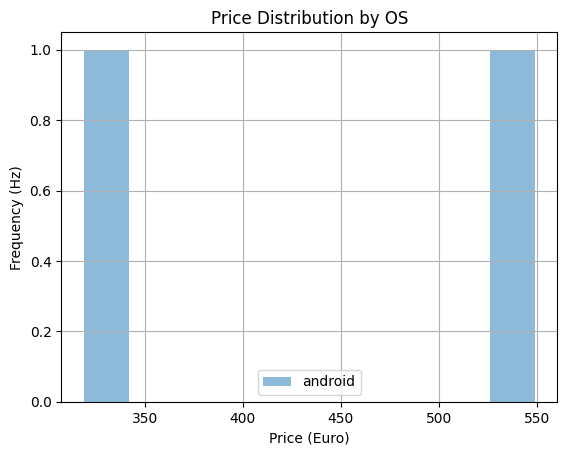

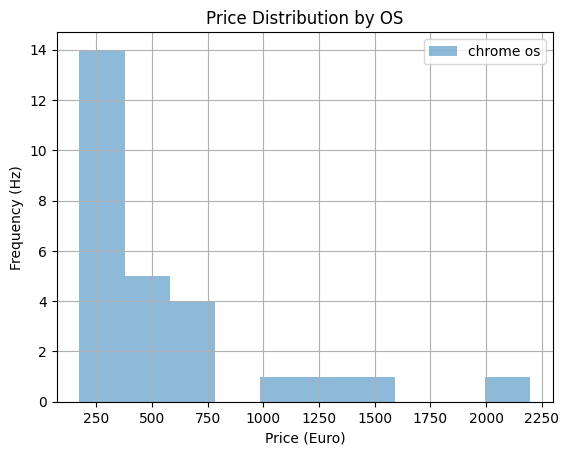

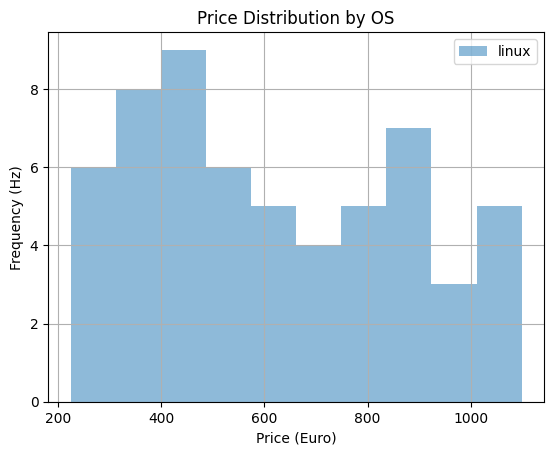

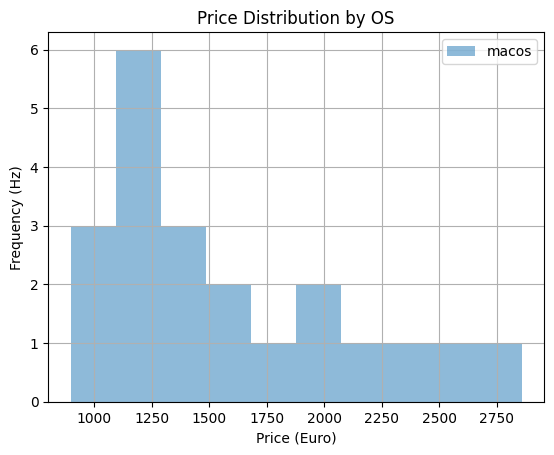

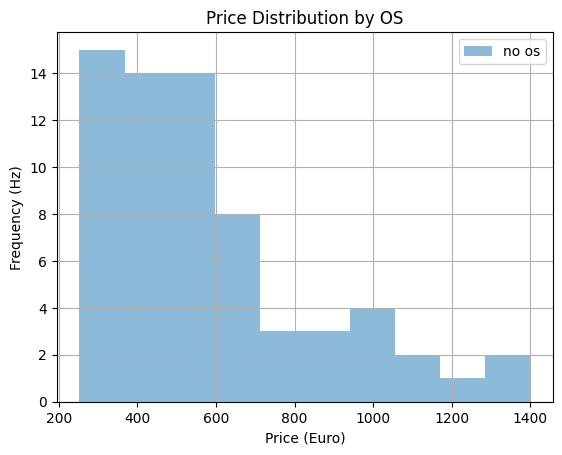

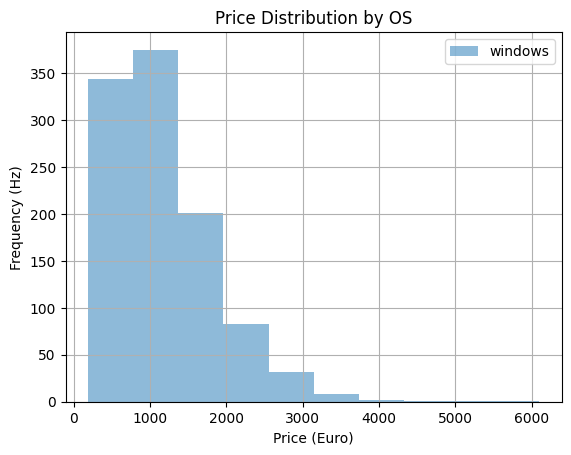

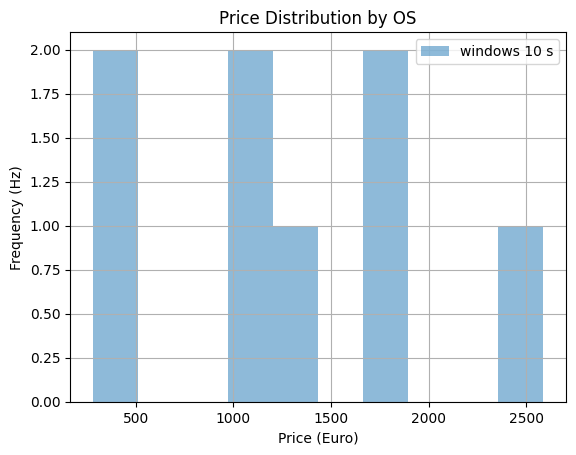

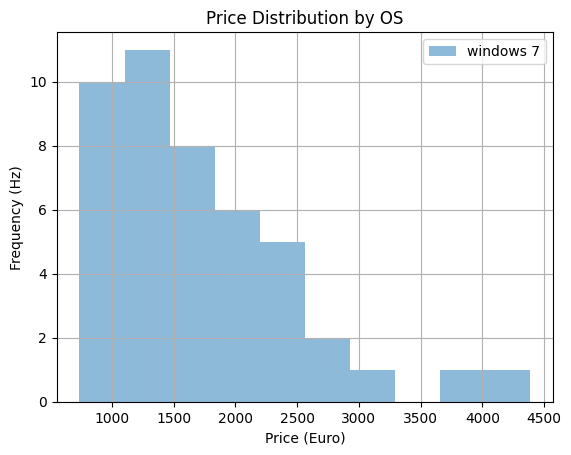

In [66]:
#Plot distribution of prices by OS
for os_type, subset in data.groupby("OpSys"):
    subset['Price (Euro)'].hist(alpha=0.5, label=os_type)
    plt.title("Price Distribution by OS")
    plt.xlabel('Price (Euro)')
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.show()

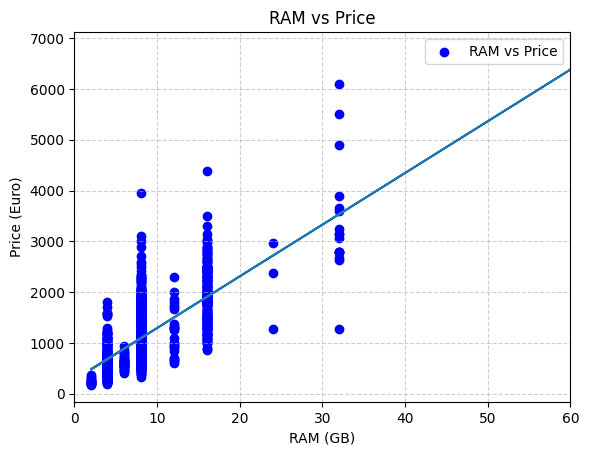

In [70]:
#Relationship between RAM and price
RAMColom=data.iloc[:,8]#Extract RAM column
priceColumn=data['Price (Euro)']#Extract Price column

#Correct RAM assignment
data['RAM']=RAMColom
slope, intercept = np.polyfit(data['RAM'], priceColumn, 1)
regressionLine = slope * data['RAM'] + intercept

#Create scatter plot
plt.scatter(data["RAM"],data['Price (Euro)'],color='b',label="RAM vs Price")

#Graph customization
plt.plot(data["RAM"], regressionLine, linestyle='-')
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.xlim(0,60)#Limit X-axis
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend()
plt.show()


In [ ]:
#Extract all storage types
data["StorageType"]=data["Memory"].str.findall(r"\b(SSD|HDD|eMMC|Flash|NVMe)\b").apply(lambda x:", ".join(x))

#Print the first few rows to verify
print(data[["Memory","StorageType"]].head())

                Memory StorageType
0            128GB SSD         SSD
1  128GB Flash Storage       Flash
2            256GB SSD         SSD
3            512GB SSD         SSD
4            256GB SSD         SSD


#Bonus

In [ ]:
#The questions that arise from the information are: 
#Which device is the most affordable to buy? (I will check who is leading in the categories that are important to me and compare them), 
# which company produced the most devices and which the fewest? (I will use functions that find minimum/maximum and a function that performs
# a count), how many and what different devices exist with common names? (I will use an operation that performs a count of names and counts
# the number of times the name appears), is there a relationship between the size and weight of the device and its price? (I will perform an
# operation that sorts devices by their price and see if their size and weight increase in correlation with their price).

In [ ]:
##The first question I was trying to solve: Which company had the most devices and which company had the fewest devices?
##I will use functions that find the minimum and maximum and a function that counts the number of names.

#Import required libraries
import pandas as pd

#Load dataset
data=pd.read_csv("laptop_price - dataset - laptop_price - dataset.csv")

#Count the number of devices for each company
company_device_count=data["Company"].value_counts()

#Find the company with the most devices
most_devices=company_device_count.idxmax() #company name
most_devices_count=company_device_count.max() #count of devices

#Find the company with the least devices
least_devices=company_device_count.idxmin() #company name
least_devices_count=company_device_count.min() #count of devices

#Print results
print(f"The company with the most devices: {most_devices} ({most_devices_count} devices)")
print(f"The company with the least devices: {least_devices} ({least_devices_count} devices)")


The company with the most devices: Dell (291 devices)
The company with the least devices: Huawei (2 devices)


In [133]:
#The second question I was trying to solve: What is the most affordable computer?
#Taking into account price, weight and RAM (all categories are of equal weight)

import numpy as np
import pandas as pd
import math

#Load dataset
data=pd.read_csv("laptop_price - dataset - laptop_price - dataset.csv")

#Find the two cheapest laptops
cheapest_laptops=data.nsmallest(2, "Price (Euro)")

#Find the two lightest laptops
lightest_laptops=data.nsmallest(2, "Weight (kg)")

#Find the two laptops with the most RAM
highest_ram_laptops=data.nlargest(2, "RAM (GB)")


#Combine results into one DataFrame
combined=pd.concat([
    cheapest_laptops.assign(Category="Cheapest"),
    lightest_laptops.assign(Category="Lightest"),
    highest_ram_laptops.assign(Category="Most RAM"),
])

#Create a unique identifier for each laptop
combined["Identifier"]=combined["Company"] + " " + combined["Product"] + " " + combined["TypeName"] + " (" + combined["Inches"].astype(str) + " inches, " + combined["ScreenResolution"] + ", " + combined["CPU_Company"] + " " + combined["CPU_Type"] + ", " + combined["RAM (GB)"].astype(str) + "GB RAM, "
most_worthwhile=combined["Identifier"].value_counts().nlargest(2)

#Print results in a more aesthetic format
print("~Best laptops by category~")
for category, df in combined.groupby("Category"):
    print(f"\n{category}:")
    if category == "Cheapest":
        print(df[["Identifier", "Price (Euro)"]].to_string(index=False))
    elif category=="Lightest":
        print(df[["Identifier", "Weight (kg)"]].to_string(index=False))
    elif category=="Most RAM":
        print(df[["Identifier", "RAM (GB)"]].to_string(index=False))

#Print the most worthwhile laptops with all relevant data
print("\n~The most worthwhile laptop (or laptops)~")
for identifier in most_worthwhile.index:
    laptop_data=combined[combined["Identifier"]==identifier].iloc[0]
    print(f"\n{identifier}:")
    print(f"Price: {laptop_data['Price (Euro)']} Euro")
    print(f"Weight: {laptop_data['Weight (kg)']} kg")
    print(f"RAM: {laptop_data['RAM (GB)']} GB")


~Best laptops by category~

Cheapest:
                                                                                                    Identifier  Price (Euro)
Acer C740-C9QX (3205U/2GB/32GB/Chrome Netbook (11.6 inches, 1366x768, Intel Celeron Dual Core 3205U, 2GB RAM,          174.0
                           Asus Vivobook E200HA Netbook (11.6 inches, 1366x768, Intel Atom x5-Z8350, 2GB RAM,          191.9

Lightest:
                                                                                                       Identifier  Weight (kg)
Lenovo Yoga Book 2 in 1 Convertible (10.1 inches, IPS Panel Touchscreen 1920x1200, Intel Atom x5-Z8550, 4GB RAM,          0.69
Lenovo Yoga Book 2 in 1 Convertible (10.1 inches, IPS Panel Touchscreen 1920x1200, Intel Atom x5-Z8550, 4GB RAM,          0.69

Most RAM:
                                                                                        Identifier  RAM (GB)
Asus ROG G701VO Gaming (17.3 inches, IPS Panel Full HD 1920x1080, Intel Cor